In [1]:
import Higgs.predictions as HP
from Higgs.tools.ImplementationUtils import implementMeasurement
from Higgs.tools.MeasurementValidation import *
import Higgs.signals as HS
import numpy as np


## ATLAS `H>cc` 139fb-1 [ATLAS-CONF-2021-021](https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/CONFNOTES/ATLAS-CONF-2021-021/)

In [2]:
measFile = implementMeasurement(
    1868064,
    "Fig. 2 (combined result)",
    {
        "cc": {
            "obs": [
                -9 - np.sqrt(10 ** 2 + 12 ** 2),
                -9,
                -9 + np.sqrt(10 ** 2 + 12 ** 2),
            ],
            "ref": [1, 1, 1],  # signal strength measurement
            "process": {"channels": [[p, "cc"] for p in ["HW", "HZ"]]},
        }
    },
    prefix="cc",
    referenceMass=125,
    massResolution=5,
)

meas = HS.Measurement(measFile)
pred = HP.Predictions()
h = pred.addParticle(HP.NeutralScalar("h"))
h.setMass(meas.referenceMass())
HP.effectiveCouplingInput(h, HP.smLikeEffCouplings, reference=meas.referenceModel())
assert np.isclose(meas(pred, {"cc": [-9, -9]}), 0)


No arxiv eprint found.
Looks good. Saving this to cc_LHC13_ATLAS_139.json


## CMS `H>cc` 36fb-1 [1912.01662](https://arxiv.org/abs/1912.01662)

In [3]:
measFile = implementMeasurement(
    "1912.01662",
    "Fig. 7",
    {
        "ZH": {
            "obs": [36 - 24, 36, 36 + 24],
            "ref": [1, 1, 1],
            "process": {"channels": [["HZ", "cc"]]},
        },
        "WH": {
            "obs": [37 - 36, 37, 37 + 36],
            "ref": [1, 1, 1],
            "process": {"channels": [["HW", "cc"]]},
        },
    },
    prefix="cc",
    referenceMass=125,
    massResolution=10,
)

Looks good. Saving this to cc_LHC13_CMS_36.json


Text(0, 0.5, '$\\mu_{ZH}^{cc}$')

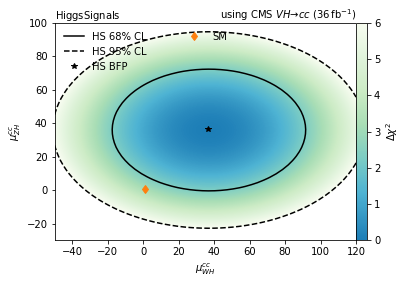

In [4]:
meas = HS.Measurement(measFile)

mu1 = np.linspace(-50, 120)
mu2 = np.linspace(-30, 100)


def modFacs(muW, muZ):
    return {"ZH": [muZ], "WH": [muW]}


fig, ax = validateMeasurementModFactors(meas, mu1, mu2, modFacs, r"$VH\to cc$")
ax.plot(1, 1, marker="d", c="tab:orange", ls="none", label="SM")
ax.legend(loc="upper center", frameon=False)

ax.set_xlabel(r"$\mu_{WH}^{cc}$")
ax.set_ylabel(r"$\mu_{ZH}^{cc}$")
